<a href="https://colab.research.google.com/github/schumbar/CMPE256/blob/main/assignment_05/OpenCVandDeepLearning/CMPE256_ImageDataMining_OpenCVandDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 256 Image Data Mining Assignment: Open CV and Deep Learning

By Shawn Chumbar

Sources:
1. Files provided by Professor:  
  a. SJSUDeepLearningFaceDetectionML.ipynb  
  b. SJSUFaceDetectionML.ipynb   

### Deep Learning Portion

In [53]:
!pip install mtcnn

In [54]:
!pip show mtcnn

Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: keras, opencv-python
Required-by: 


In [55]:
from google.colab import drive
drive.mount('/content/drive')
# https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [57]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

In [58]:
file_path_1 = '/content/drive/MyDrive/Colab Notebooks/CMPE256/assignment_05/OpenCVAndDeepLearning/SJSUOfficers2019.jpg'
file_path_2 = '/content/drive/MyDrive/Colab Notebooks/CMPE256/assignment_05/OpenCVAndDeepLearning/SJSU_Project_Expo.jpg'

In [59]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
 # load the image
 data = pyplot.imread(filename)
 # plot the image
 pyplot.imshow(data)
 # get the context for drawing boxes
 ax = pyplot.gca()
 # plot each box
 for result in result_list:
  # get coordinates
  x, y, width, height = result['box']
  # create the shape
  rect = Rectangle((x, y), width, height, fill=False, color='red')
  # draw the box
  ax.add_patch(rect)
 # show the plot
 pyplot.show()

In [60]:
def detect_faces(filename):
  # load image from file
  pixels = pyplot.imread(filename)
  # create the detector, using default weights
  detector = MTCNN()
  # detect faces in the image
  faces = detector.detect_faces(pixels)
  # display faces on the original image
  draw_image_with_boxes(filename, faces)

4/4 [==============================] - 0s 55ms/step


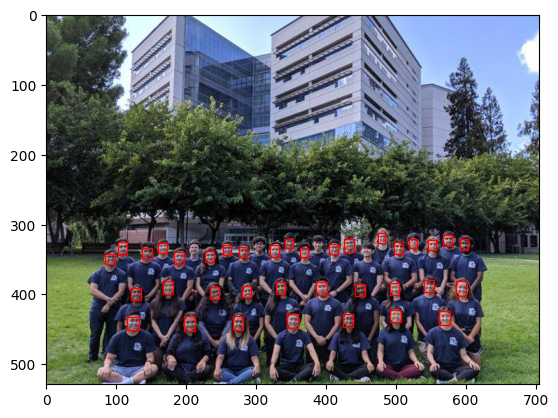

In [61]:
detect_faces(file_path_1)

5/5 [==============================] - 1s 105ms/step


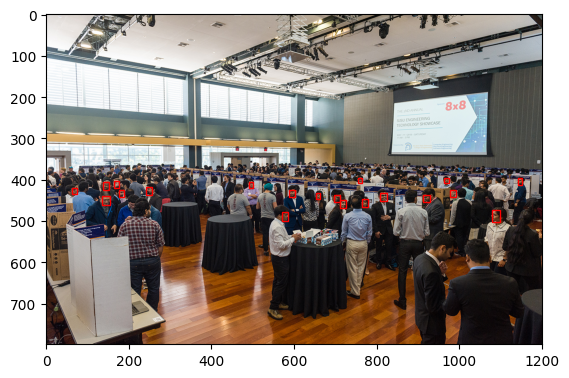

In [62]:
detect_faces(file_path_2)

### Open-CV Portion

In [63]:
!pip install opencv-python

In [64]:
# check opencv version
import cv2
# print version number
print(cv2.__version__)
# https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

4.8.0


In [65]:
from cv2 import imread
from cv2 import CascadeClassifier
# load the pre-trained model
# classifier = CascadeClassifier('/content/drive/My Drive/haarcascade_frontalface_default.xml')

classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [66]:
classifier

< cv2.CascadeClassifier 0x7c5d843093b0>

In [67]:
from google.colab.patches import cv2_imshow
from cv2 import waitKey
from cv2 import destroyAllWindows

In [68]:
from cv2 import rectangle

def open_cv_detect_faces(file_path):
  # load the photograph
  pixels = imread(file_path)
  pixels
  # perform face detection
  bboxes = classifier.detectMultiScale(pixels)
  # print bounding box for each detected face
  for box in bboxes:
    print(box)
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # draw a rectangle over the pixels
    rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
  # show the image
  cv2_imshow(pixels)

  # keep the window open until we press a key
  waitKey(0)
  # close the window
  destroyAllWindows()


[540 319  26  26]
[582 381  26  26]
[421 425  24  24]
[342 426  25  25]
[114 428  25  25]
[193 430  25  25]
[263 430  25  25]


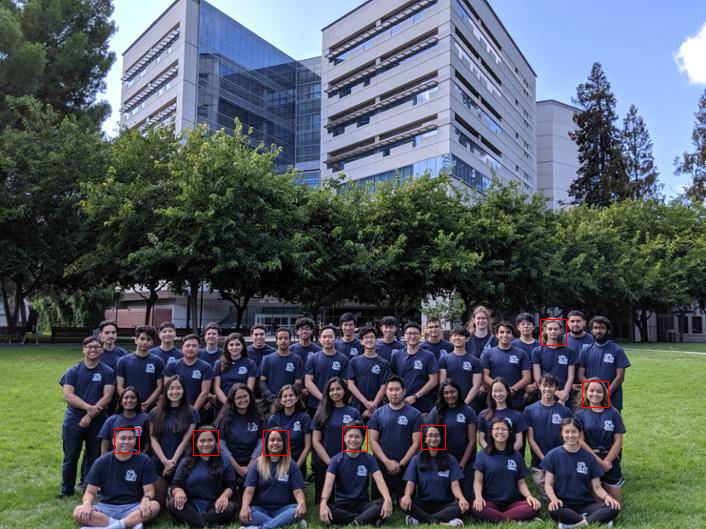

In [69]:
open_cv_detect_faces(file_path_1)

[711 549  75  75]
[225 656  25  25]


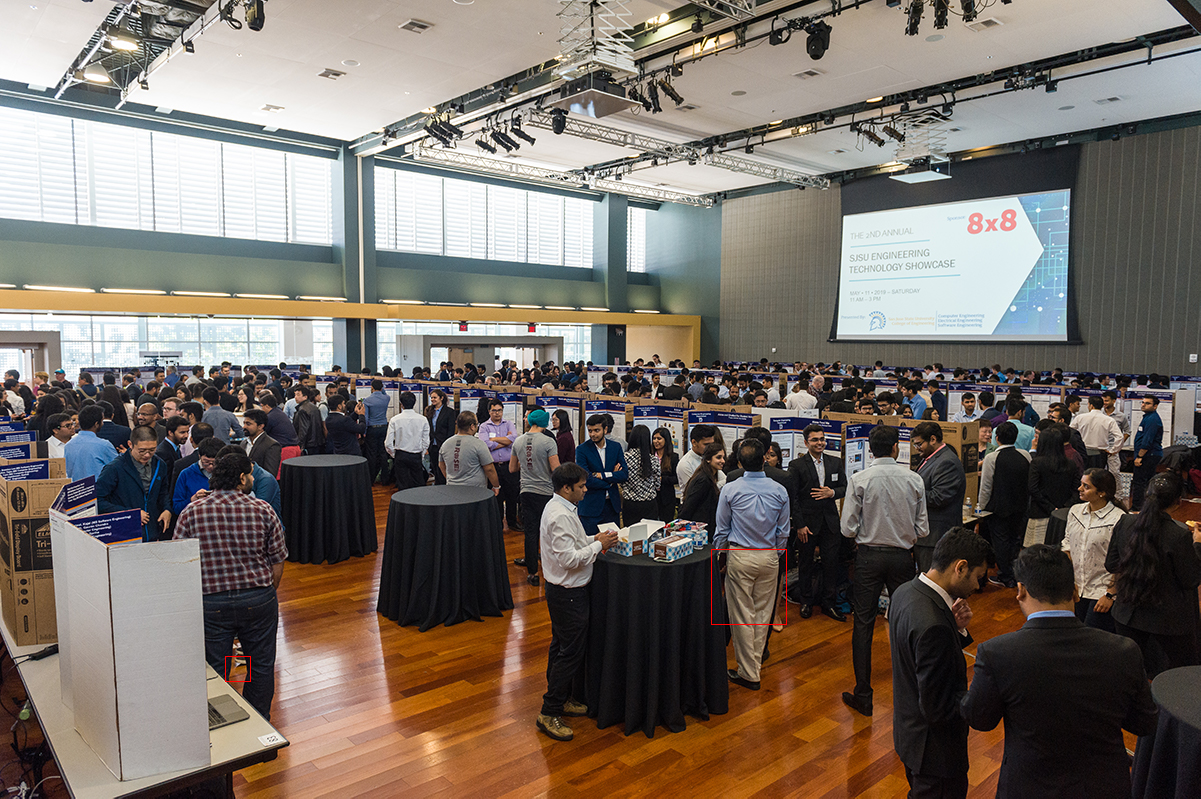

In [70]:
open_cv_detect_faces(file_path_2)